In [ ]:
import pandas as pd
import numpy as np

## checking out the data first
pheno = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Cognition_DS_2022.09.27_GRU-IRB-PUB.csv')
pheno_dd = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Biomarker_DD_2022.09.27.csv')
cognition_DD = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/ADSP-PHC-Cognition_DD_2022.09.27.csv')

In [4]:
pheno


,Study,SUBJID,PHC_Visit,PHC_Age,PHC_Diagnosis,PHC_Sex,PHC_Race,PHC_Ethnicity,PHC_Education,PHC_MEM,PHC_EXF,PHC_LAN,PHC_VSP
0,NACC,A-ADC-AD000003,1,69.74401095,1.0,2,3,2.0,6.0,-0.408,-1.272,-1.172,NaN
1,NACC,A-ADC-AD000003,2,70.67761807,3.0,2,3,2.0,6.0,-0.492,-1.254,-1.121,NaN
2,NACC,A-ADC-AD000003,3,71.67693361,3.0,2,3,2.0,6.0,-0.528,NaN,-1.121,NaN
3,NACC,A-ADC-AD000007,1,69.99863107,1.0,1,3,2.0,14.0,0.453,-0.241,0.012,NaN
4,NACC,A-ADC-AD000007,2,71.06365503,1.0,1,3,2.0,14.0,0.241,-0.223,0.429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25819,ADNI,G-ADNI-AN000321,2,71.1321013,1.0,1,5,2.0,18.0,0.877,0.806,1.335,NaN
25820,ADNI,G-ADNI-AN000321,3,73.2183436,2.0,1,5,2.0,18.0,0.792,1.217,1.223,NaN
25821,ADNI,G-ADNI-AN000321,4,74.21218344,2.0,1,5,2.0,18.0,0.714,1.205,1.281,NaN
25822,ADNI,G-ADNI-AN000309,1,75.61396304,1.0,2,5,2.0,15.0,0.006,0.639,0.364,NaN


In [52]:
cognition_DD

,VARNAME,VARDESC,COMMENT,VALUES,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Study,Cohort Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SUBJID,ADSP Subject ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHC_Visit,Harmonized Visit Number,Given differences in visit codes across cohort...,NaN,NaN,NaN,NaN,NaN,NaN
3,PHC_Age,Age at Each Visit. Note this is a character v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHC_Diagnosis,Status of Alzheimer's Diagnosis,NaN,1 = No Cognitive Impairment,2 = Mild Cognitive Impairment,3 = Alzheimer's Dementia,NA = Not available or Other Dementia (not AD),NaN,NaN
5,PHC_Sex,Sex,NaN,1 = Male,2 = Female,NaN,NaN,NaN,NaN
6,PHC_Race,NIH Racial Categories,NaN,1 = American Indian or Alaska Native,2 = Asian,3 = Black or African American,4 = Native Hawaiian or Other Pacific Islander,5 = White,"6 = Other, Unknown, or More than one race"
7,PHC_Ethnicity,Hispanic or Latino or Not Hispanic or Latino,NaN,1 = Hispanic or Latino,2 = Not Hispanic or Latino,NA = Not available,NaN,NaN,NaN
8,PHC_Education,Years of Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PHC_MEM,Harmonized Composite Memory Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
pheno_dd

,VARNAME,VARDESC,COMMENT,VALUES,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Study,Cohort Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SUBJID,ADSP Subject ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHC_Visit,Harmonized Visit Number,"See ""ADSP-PHC-Cognition_DD_2022.09.27.csv"" for...",NaN,NaN,NaN,NaN,NaN,NaN
3,PHC_Age,Age at Each Visit. Note this is a character va...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHC_Diagnosis,Status of Alzheimer's Diagnosis,NaN,1 = No Cognitive Impairment,2 = Mild Cognitive Impairment,3 = Alzheimer's Dementia,NA = Not available or Other Dementia (not AD),NaN,NaN
5,PHC_Sex,Sex,NaN,1 = Male,2 = Female,NaN,NaN,NaN,NaN
6,PHC_Race,NIH Racial Categories,NaN,1 = American Indian or Alaska Native,2 = Asian,3 = Black or African American,4 = Native Hawaiian or Other Pacific Islander,5 = White,"6 = Other, Unknown, or More than one race"
7,PHC_Ethnicity,Hispanic or Latino or Not Hispanic or Latino,NaN,1 = Hispanic or Latino,2 = Not Hispanic or Latino,NA = Not available,NaN,NaN,NaN
8,PHC_Education,Years of Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PHC_AB42,Harmonized Z-Score for AB42 Biomarker Levels,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

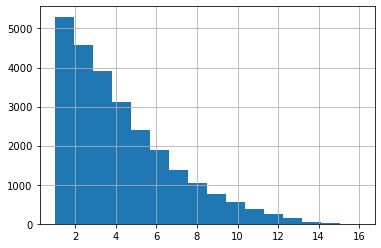

In [12]:
pheno.PHC_Visit.hist(bins=16)

In [20]:
new_pheno= pheno.loc[:,['SUBJID', 'PHC_Visit', 'PHC_Age', 'PHC_Diagnosis', 'PHC_Sex', 'PHC_Race']]
new_pheno['Diagnosis'] = new_pheno['PHC_Diagnosis'].apply(lambda x: 1 if x == 3 else 0) 
#df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

In [33]:
print('Diagnosis 0/1')
print(new_pheno.Diagnosis.value_counts())

print('\n')
print('PHC Diagnosis 0-5')
pheno.PHC_Diagnosis.value_counts()


Diagnosis 0/1
0    19969
1     5855
Name: Diagnosis, dtype: int64


PHC Diagnosis 0-5


1.0    11743
2.0     6235
3.0     5855
Name: PHC_Diagnosis, dtype: int64

In [73]:
change_status= pd.DataFrame(new_pheno.groupby('SUBJID')['Diagnosis'].mean())
ID_change_status = pd.Series(change_status[(change_status.Diagnosis > 0 )& (change_status.Diagnosis <1)].index)

In [62]:
change_status[(change_status.Diagnosis > 0 )& (change_status.Diagnosis <1)]

,Diagnosis
SUBJID,
A-ADC-AD000003,0.666667
A-ADC-AD000769,0.250000
A-ADC-AD000786,0.100000
A-ADC-AD000805,0.200000
A-ADC-AD000817,0.375000
...,...
G-ADNI-AN000755,0.833333
G-ADNI-AN000758,0.500000
G-ADNI-AN000761,0.500000


In [74]:
ID_change_status 

0       A-ADC-AD000003
1       A-ADC-AD000769
2       A-ADC-AD000786
3       A-ADC-AD000805
4       A-ADC-AD000817
            ...       
897    G-ADNI-AN000755
898    G-ADNI-AN000758
899    G-ADNI-AN000761
900    G-ADNI-AN000767
901    G-ADNI-AN000772
Name: SUBJID, Length: 902, dtype: object